# Estadística Inferencial

## Contenido

- [Prueba de Hipótesis](#Prueba-de-Hipótesis)
    - [¿Qué es una hipótesis y cómo se especifica una?](#¿Qué-es-una-hipótesis-y-cómo-se-especifica-una?)
    - [La hipótesis nula](#La-hipótesis-nula)
    - [P-valor](#P-valor)
    - [Tipos de Hipótesis Alternativas](#Tipos-de-Hipótesis-Alternativas)
    - [Tipos de Errores](#Tipos-de-Errores)
    - [Prueba paramétrica vs no paramétrica](#Prueba-paramétrica-vs-no-paramétrica)
    
    
- [Correlación](#Correlación)
    - [Covarianza y correlación: fórmulas](#Covarianza-y-correlación:-fórmulas)
    - [El problema con Pearson](#El-problema-con-Pearson)
    
    
- [T-test](#T-test)
    - [T-test de una muestra](#T-test-de-una-muestra)
    - [T-test de dos muestras](#T-test-de-dos-muestras)
    - [Wilcoxon signed-rank (T-test no paramétrico)](#Wilcoxon-signed-rank-(T-test-no-paramétrico))
    
    
    
    
- [Ejercicio](#Ejercicio)

## Prueba de Hipótesis


Para que la estadística sea de utilidad no basta con calcular estadísticos, también se tienen que tomar decisiones basadas en los datos que estamos analizando, que acepte o rechace una afirmación relativa al valor de un parámetro. Estas afirmaciones que nos permiten aceptar o rechazar algo, reciben el nombre de hipótesis y el método estadístico de toma de decisión sobre una hipótesis recibe el nombre de prueba de hipótesis. Solemos tener dos hipótesis, una que queremos que ocurra, y otra que tomaremos si no ocurre la primera, la hipótesis alternativa $H_1$ es la hipótesis de la que busco evidencia de que ocurra y la hipótesis nula $H_0$ es la que rechazaremos si tenemos evidencia de la alternativa, _aceptaremos $H_0$ a menos que la evidencia diga lo contrario_.

[Regresar al contenido](#Contenido)

<hr>

# ¿Qué es una hipótesis y cómo se especifica una?


Una afirmación falsable que requiere verificación, generalmente a partir de datos experimentales u observacionales, y que permite realizar predicciones sobre observaciones futuras.



## La hipótesis nula


La _hipótesis nula_ es la _hipótesis aburrida_ ($H_0$), la hipótesis de que no sucede nada interesante en los datos.

En la investigación, se especifica la _hipótesis alternativa_ ($H_1$).

**En el análisis estadístico, prueba la hipótesis nula.**

- $H_1$ → La gente comprará más widgets después de ver el anuncio $X$ en comparación con el anuncio $Y$.

- $H_0$ → El tipo de anuncio no tiene ningún efecto en las compras de widgets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from jupyterthemes import jtplot
jtplot.style()

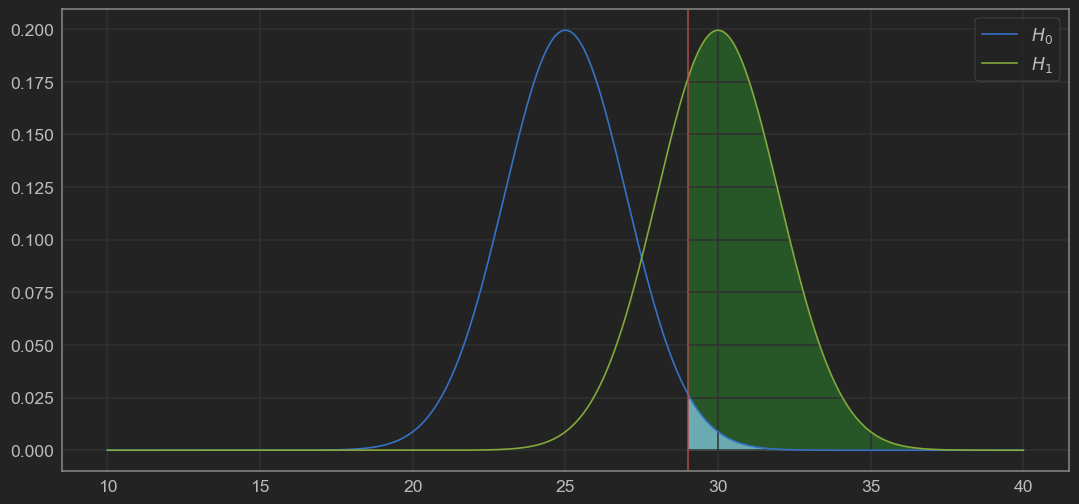

In [39]:
h0 = stats.norm(25, 2)
h1 = stats.norm(30, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$')
ax.axvline(29, color = 'r', alpha = 0.5)


ax.axvline(29, color = 'r', alpha = 0.5)
ax.fill_between(x, h1.pdf(x), where=((x >= 29)), color = 'limegreen', alpha = 0.3)
ax.fill_between(x, h0.pdf(x), where=((x >= 29)), color = 'skyblue', alpha = 0.7)
ax.legend();

In [40]:
1 - h0.cdf(29), 1 - h1.cdf(29)

(0.02275013194817921, 0.6914624612740131)

In [28]:
(x == 3) & (x < 34);

[Regresar al contenido](#Contenido)

# P-valor

- ¿Qué posibilidades hay de que ocurra el valor de $H_1$ si $H_0$ es verdadero?

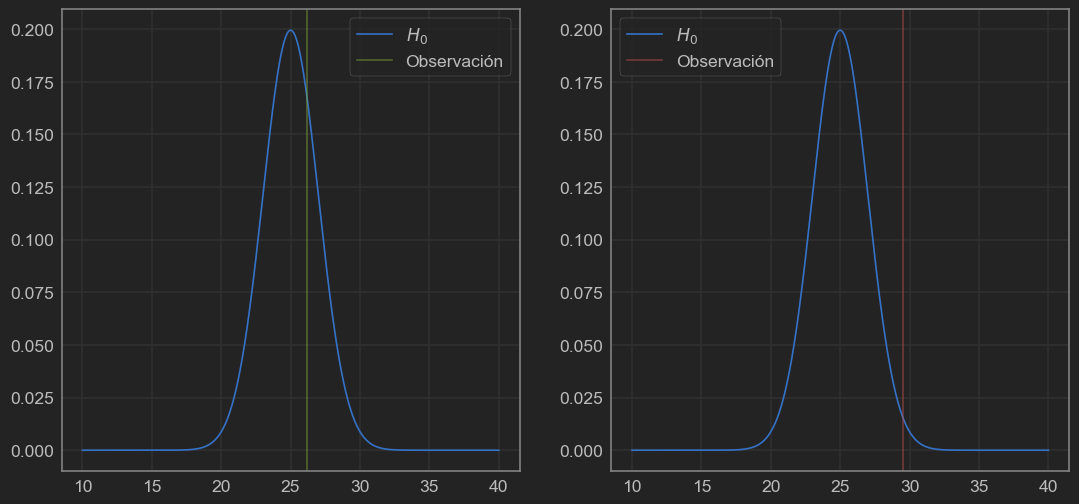

In [45]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].axvline(26.2, color = 'g', alpha = 0.5, label = 'Observación')
ax[0].legend()


ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax[1].legend();

Concepto importante:

- No podemos probar que $ H_1 $ sea cierto. Solo podemos calcular la probabilidad de que se pueda observar el estadístico de prueba asociado con $ H_1 $ dado que no hay un efecto verdadero.


Los valores p son probabilidades. Van de 0 a 1.

- Los valores más cercanos a 0 indican una baja probabilidad de $ H_1 | H_0 $
- Los valores más cercanos a 1 indican una alta probabilidad de $ H_1 | H_0 $


Un hallazgo se denomina `estadísticamente significativo` si el estadístico de prueba es mayor que un umbral.

Eso es si $p(H_1) < p(\alpha)$
El umbral es arbitrario, los valores comunes son $p = 0.5$ o $p = 0.01$

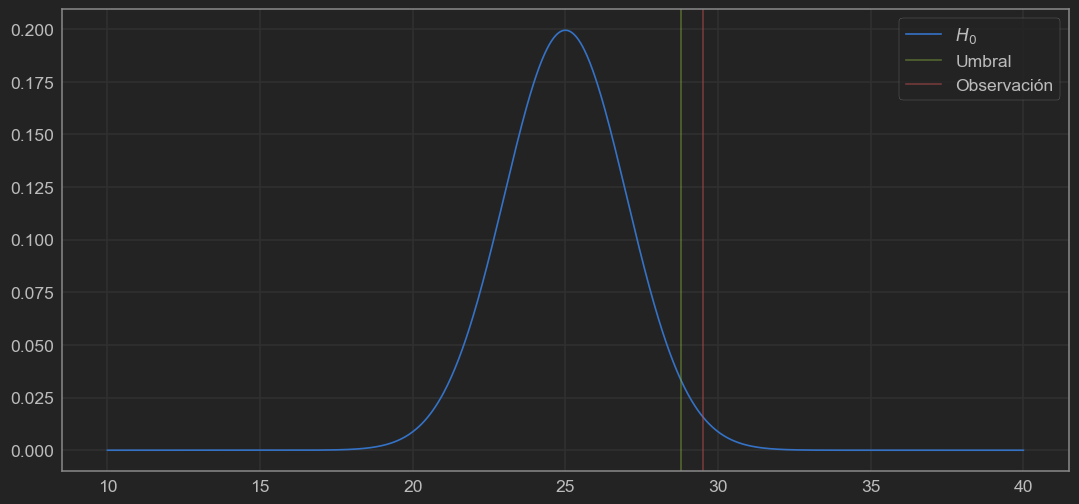

In [51]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(28.8, color = 'g', alpha = 0.5, label = 'Umbral')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.legend();

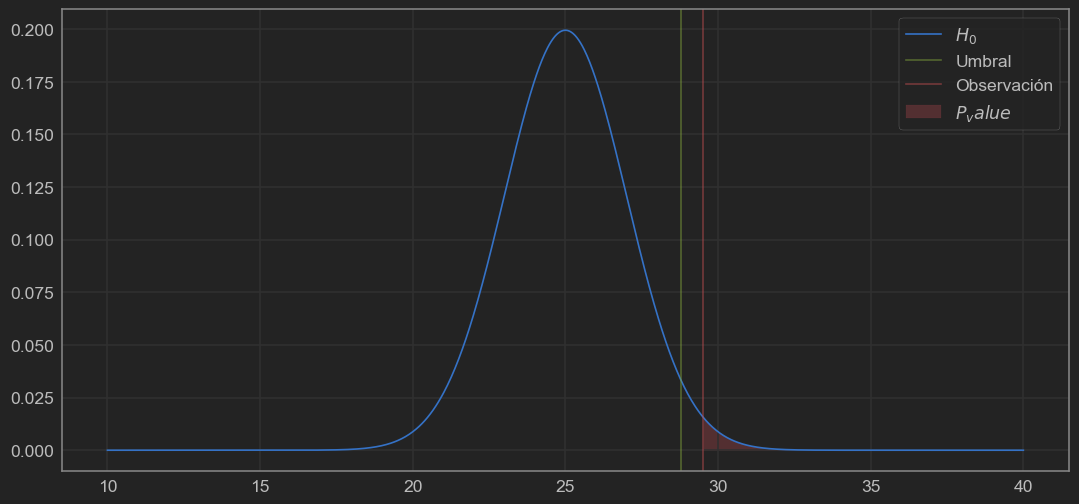

In [53]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(28.8, color = 'g', alpha = 0.5, label = 'Umbral')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.fill_between(x, h0.pdf(x), where = (x >= 29.5), color = 'r', alpha = 0.3, label = '$P_value$')
ax.legend();

Cada lado de la distribución $H_0$ es poco probable.

El umbral del valor p se refiere a toda el área de significancia.

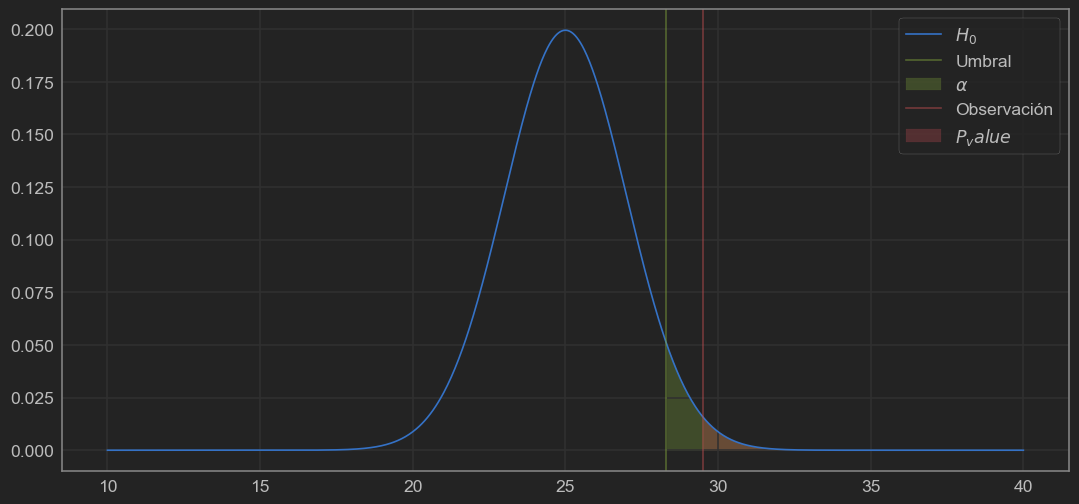

In [60]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(0.95), color = 'g', alpha = 0.5, label = 'Umbral')
ax.fill_between(x, h0.pdf(x), where = (x >= h0.ppf(0.95)), color = 'g', alpha = 0.3, label = '$\\alpha$')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.fill_between(x, h0.pdf(x), where = (x >= 29.5), color = 'r', alpha = 0.3, label = '$P_value$')
ax.legend();

In [61]:
1 - h0.cdf(h0.ppf(0.95))

0.050000000000000155

In [58]:
h0.ppf(0.95)

28.289707253902943

Una cosa importante que hay que tener en cuenta es que si nosotros no establecemos un nivel de significancia $\alpha$ entonces:

- Aceptamos $H_0$ si el p-valor es "grande" ($\geq 0.1$)
- Rechazamos $H_0$ si el p-valor es "pequeño" ($\leq 0.05$)
    - El p-valor es _significativo_ si es $ < 0.05$
    - El p-valor es _fuertemente significativo_ si es $ < 0.01$
    - El p-valor es _Muy significativo_ si es $ < 0.001$
    
    
Pero si el p-valor esta entre 0.05 y 0.1, entonces se requerirán estudios posteriores, es lo que se denomina la _zona crepuscular_ o _twilinght zone_. Es decir no podemos concluir si podemos rechazar o no $H_0$.

[Regresar al contenido](#Contenido)




### Tipos de Hipótesis Alternativas


Al momento de realizar una prueba de hipótesis lo vamos a representar de la siguiente manera:

$$
\left\{
\begin{array}{ll}
H_0 & \text{Hipótesis nula}\\
H_1 & \text{Hipótesis alternativa}\\
\end{array}
\right.
$$

Hay que generar una regla de decisión para poder rechazar o no la hipótesis nula partir de la información que contenga la muestra. Tengan en cuenta que es imposible encontrar evidencias de que un parámetro $\mu$ sea igual a cierto valor $\mu_0$, pero si podemos encontrar evidencia de que $\mu < \mu_0$, $\mu > \mu_0$ o $\mu \neq \mu_0$, sabiendo esto la hipótesis alternativa y nula se caracterizaran por lo siguiente:


$$
\left\{
\begin{array}{llll}
H_0: & = & \leq & \geq\\
H_1: & < & > & \neq\\
\end{array}
\right.
$$

por ejemplo si queremos decidir si la media es más pequeña que 2 o no.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = 2\\
H_1: & \mu < 2\\
\end{array}
\right.
$$

si queremos decidir si la media es igual o diferente de 5:


$$
\left\{
\begin{array}{ll}
H_0: & \mu = 5\\
H_1: & \mu \neq 5\\
\end{array}
\right.
$$


Esto nos provoca que haya dos tipos de pruebas, las pruebas unilaterales: Donde $H_1: \mu < \mu_0$ o $H_1: \mu > \mu_0$, o las pruebas bilaterales: $H_1: \mu \neq \mu_0$. El test toma el nombre de las hipótesis alternativas.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu < \mu_0\\
\end{array}
\right.
$$

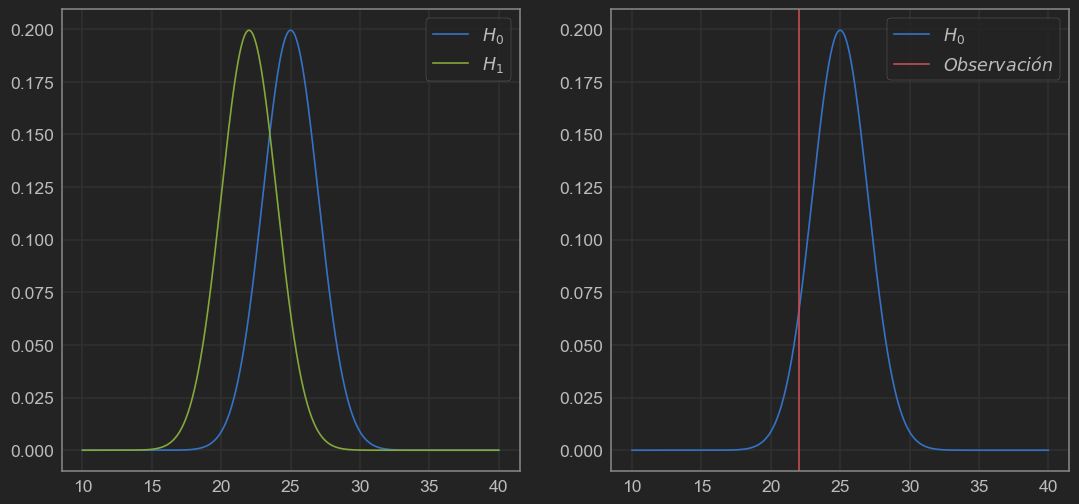

In [65]:
h0 = stats.norm(25, 2)
h1 = stats.norm(22, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu > \mu_0\\
\end{array}
\right.
$$

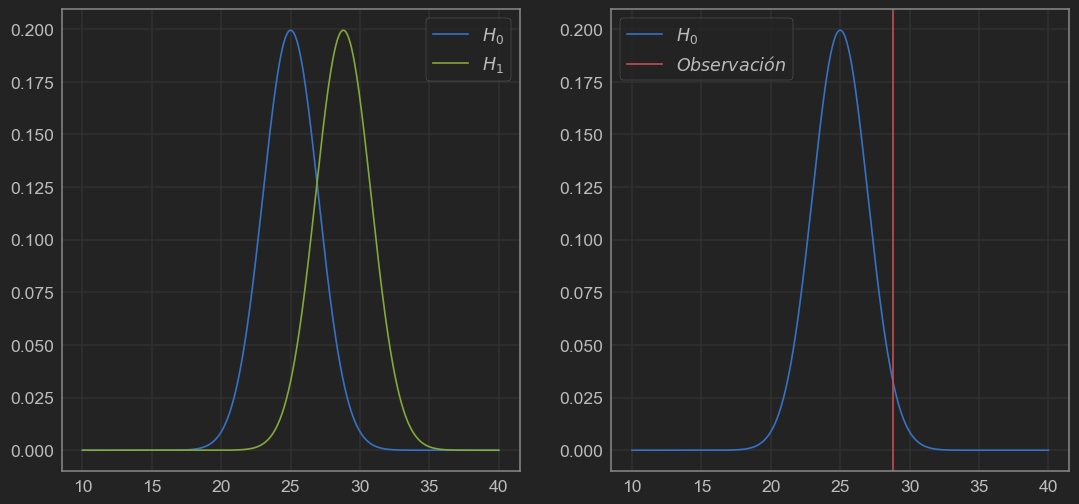

In [66]:
h0 = stats.norm(25, 2)
h1 = stats.norm(28.8, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu \ne \mu_0\\
\end{array}
\right.
$$

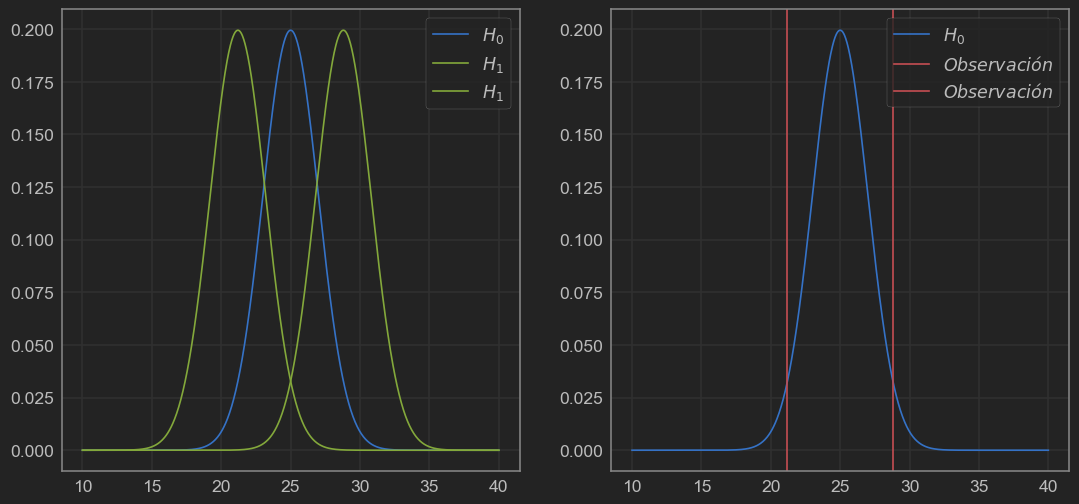

In [67]:
h0 = stats.norm(25, 2)
h1 = stats.norm(28.8, 2)
h2 = stats.norm(21.2, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$', color = 'g')
ax[0].plot(x, h2.pdf(x), label = '$H_1$', color = 'g')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].axvline(h2.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

[Regresar al contenido](#Contenido)

### Tipos de Errores


Dado que podemos tomar una decisión con base a la muestra que estamos trabajando, y equivocarnos una prueba de hipótesis puede tener uno de los siguientes cuatro resultados:




|Decisión/Realidad|$H_0$ es verdadera|$H_0$ es falsa|
|:---------------:|:----------------:|:------------:|
|Fracasar en rechazar $H_0$|Decisión correcta de tipo A|Error de tipo II|
|rechazar $H_0$|Error de tipo I|Decisión correcta de tipo B|



<img src = 'https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg'  > 


La decisión correcta de tipo A y B son _fracasar en rechazar $H_0$ cuando $H_0$ es verdadera_ y _rechazar $H_0$ cuando $H_0$ es falsa_. Ahora, no siempre se puede tomar la decisión correcta, por lo que existen los errores de tipo I y II, el error de tipo I es un _falso positivo_ (recordemos que el objetivo del investigador es rechazar $H_0$), es decir, este error se comete cuando e rechaza $H_0$ siendo esta verdadera, el error de tipo I tiene asociado una probabilidad de que ocurra que denotamos $\alpha$ y es denominada significancia de la prueba. Por su parte el error de tipo II es un _falso negativo_ y ocurre cuando no se rechaza $H_0$ siendo esta falsa, la probabilidad de que cometamos un error de tipo II la denotamos por $\beta$.

Para encontrar estos errores se asigna una pequeña probabilidad a cada una de ellas, las probabilidades más comúnmente usadas para $\alpha$ y $\beta$ son 0.01 y 0.05. Por su lado las dos decisiones correctas tienen también sus propias probabilidades, para la decisión correcta de tipo A la probabilidad es $1-\alpha$ y para la decisión correcta de tipo B es $1 - \beta$. A la probabilidad $1 - \beta$ se le llamada _potencia de la prueba_ porque es la medida de la capacidad de la prueba de rechazar una hipótesis nula falsa.

$$P(\text{Error tipo I}) = P(\text{Rechazar} H_0|H_0 \text{es cierta}) = \alpha$$

$$P(\text{Error tipo II}) = P(\text{Aceptar} H_0|H_0 \text{es falsa}) = \beta$$

[Regresar al contenido](#Contenido)

# Prueba paramétrica vs no paramétrica

Qué no significa `no paramétrico`:

- ** Sin parámetros en absoluto **

Significado correcto:

- Estadísticas que no se basan en supuestos sobre la distribución subyacente.
- Métodos de inferencia estadística que generan la distribución $H_0$ a partir de los datos, no de una ecuación.

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| T-test de 1 muestra | Prueba de rangos singulares de Wilcoxon |
| T-test t de 2 muestras | Prueba U de Mann-Whitney |
| Correlación de Pearson | Correlación de Sperman |



** Ventajas y limitaciones **

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| Estándar, ampliamente utilizado | Algunos no son estándar |
| Basado en supuestos | No basado en supuestos |
| Las suposiciones deben probarse | Puede ser lento |
| Puede ser incorrecto cuando se violan las suposiciones | Apropiado para datos no numéricos |
| Computacionalmente rápido | Apropiado para tamaños de muestra pequeños |
|| Algunos métodos dan resultados diferentes cada vez |

**Conclusión**

Utilice métodos paramétricos cuando sea posible, y utilice métodos no paramétricos cuando sea necesario.

[Regresar al contenido](#Contenido)

# Correlación

En el sentido más amplio, la correlación es cualquier asociación estadística, aunque comúnmente se refiere al grado en que un par de variables están relacionadas linealmente.

- Un análisis de correlación calcula un coeficiente de correlación.

- el coeficiente de correlación es un número único que muestra la relación entre dos variables.

- El coeficiente de correlación varía entre -1 y 1.

    - -1 significa una relación inversa perfecta.
    - 0 significa que no hay relación
    - 1 significa una relación positiva perfecta.

- El coeficiente de correlación en sí mismo es una medida continua de la fuerza de la correlación. Se debe calcular un valor p correspondiente para interpretar su significación estadística.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg'>



## Correlación vs causalidad

- La correlación simplemente muestra una relación.
- No revela ni implica causalidad.
- La causalidad puede demostrarse mediante manipulaciones experimentales.

**Ejemplo**

- Helado → Ataques de tiburones

[Regresar al contenido](#Contenido)


## Covarianza y correlación: fórmulas

¿Cuál es la diferencia entre covarianza y correlación ?:

- La covarianza es un número único que mide la relación lineal entre dos variables.
- La covarianza está en la misma escala que los datos originales.
- La correlación es la covarianza escalada.
- Es independiente de la escala de datos.

**Covarianza**

$$cov[X, Y] = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$


**Correlación**

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$


**P-valor**

$$t_{n-2} = \frac{r \sqrt{n - 2}}{1 - r^2}$$

- La significancia estadística se calcula a partir de un valor t que se basa en la fuerza de la correlación y el número de puntos de datos.

[Regresar al contenido](#Contenido)


## El problema con Pearson

<img src = 'https://www.researchgate.net/profile/Andrew-Heathcote/publication/280302159/figure/fig2/AS:614021682171910@1523405585885/Anscombes-quartet-highlights-the-importance-of-plotting-data-to-confirm-the-validity-of.png'>


- La correlación de Pearson puede representar de forma excesiva o insuficiente las relaciones si contienen no linealidades o valores atípicos.

- Pearson es apropiado para datos distribuidos normalmente.



### Correlación de Spearman

Este es el método dominante para las correlaciones no paramétricas y es una alternativa para la correlación de Pearson.

- Pearson y Spearman convergen cuando los datos se distribuyen normalmente.


La $\rho$ de Spearman busca una una relación monótona, independientemente de si la relación es lineal o no lineal.


- Para calcular $\rho$, los datos son ordenados y reemplazados por su respectivo orden.

    - $ [3321654, -40, 1, 0] a [4, 1, 3, 2] $
    
- Calcular el coeficiente de correlación de Pearson en rangos.

- Mismo valor p para Pearson.

[Regresar al contenido](#Contenido)


# T-test

## Propósito e interpretación de la prueba t

La prueba T es una de las estadísticas más importantes y más utilizadas. La idea principal de la prueba t es comparar los valores (normalmente la media) entre dos grupos.

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

La fórmula general del t-test es la siguiente:

$$t_k = \frac{\bar{x} - \bar{y}}{\frac{s}{\sqrt{n}}}$$

[Regresar al contenido](#Contenido)

## T-test de una muestra

Pruebe si se pudo haber extraído un conjunto de números de una distribución con una media especificada.


- Probar si el coeficiente intelectual de un grupo de estudiantes es significativamente diferente de 100.

$$t_{n - 1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$


- $\bar{x}$ → media muestral
- $\mu$ → valor de $H_0$ 
- $s$ → desviasión estandar muestral
- $n$ → Número de puntos
- $n - 1$ → grados de libertad

### T-test de una muestra: supuestos

1. Los datos son numéricos (no categóricos).
2. Los datos son independientes entre sí.
3. Los datos se extraen aleatoriamente de la población a la que se debe hacer una generalización.
4. La media y la desviación estándar son medidas válidas de tendencia central y dispersión.

$$
\left\{
\begin{matrix}
H_0 & \mu = 0\\
H_1 & \mu \ne 0\\
\end{matrix}
\right.
$$

$$t_{n - 1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

[Regresar al contenido](#Contenido)

# T-test de dos muestras

Pruebe si se podrían haber extraído dos conjuntos de números de la misma distribución.


**Ejemplo**

- Pruebe si los niveles de estrés autoinformados cambian después de 6 semanas de 'distanciamiento social'.

(Declaraciones formales: Estime la probabilidad de que los niveles de estrés autoinformados antes y después de 6 semanas de distanciamiento social se extraigan de la misma distribución).

Hay varias fórmulas de prueba t de dos muestras. El numerador es siempre el mismo, pero el denominador depende de si los grupos están emparejados o no emparejados, tienen una varianza igual o desigual y tienen tamaños de muestra emparejados o diferentes.

- Emparejado o no emparejado: si los dos grupos de datos provienen del mismo o de diferentes individuos.

    - Emparejado: Los mismos individuos autoinforman sus niveles de estrés antes y después del distanciamiento social.
    - No emparejado: cambio en el estrés relacionado con el distanciamiento social en Dinamarca frente a Singapur.

- Varianza igual o desigual: si los dos grupos tienen (aproximadamente) la misma varianza.

    - Igualdad de varianza: los grupos 'A' y 'B' son estudiantes caucásicos de 20 años de la misma universidad; El grupo 'A' estudia ingeniería y el grupo 'B' estudia informática.
    - Varianza desigual: el grupo 'A' son estudiantes caucásicos de 20 años de la misma universidad de ingeniería, el grupo 'B' es una muestra aleatoria de 20 años de todo el país.

- Tamaños de muestra iguales o desiguales: si los grupos tienen el mismo número de valores (se aplica solo a grupos no apareados).

$$t_{df} = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{(n_1 - 1)s_{1}^{2} + (n_2 - 1)s_{2}^{2}}{n_1 + n_2 - 2}} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$


- Comparar el tiempo medio de diferencia en los pacientes que recibieron placebo y la droga 'T'

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

[Regresar al contenido](#Contenido)

# Wilcoxon signed-rank (T-test no paramétrico)


Alternativa no paramétrica al T-test de una o dos muestras.

- Se utiliza principalmente cuando los datos no se ajustan al supuesto de normalidad.

- Pruebe las diferencias en las medianas en lugar de las diferencias en las medias (la mediana es insensible a los valores atípicos)


| Nombre de la prueba | Cuándo usar |
|: -------: |: ---------: |
| Wilcoxon signed-rank | Una muestra |
| Signed-rank | Dos muestras emparejadas |
| U-test de Mann-Whitney | Dos muestras independientes |
| U-test de Mann-Whitney-Wilcoxon | Dos muestras independientes |
| Wilcoxon rank-sum test | Dos muestras independientes |


1. Eliminar pares iguales (eliminar pares iguales de puntos de datos que igualen el valor $H_0$)
    - ¿Por qué? Los pares iguales no contribuyen a la prueba de ninguna manera.
2. Transforma a ranking las direrencias
    - $r = rank(|x - y|)$
    

3. Suma ranking donde $x > y$
    - $W = \sum (r \times (x > y))$
    
    
4. Convertir a z

$$Z = \frac{W - \frac{n(n + 1)}{4}}{\sqrt{\frac{n(n + 1)(2n + 1)}{24}}}$$



- $n$ Es el número de pares restantes.
- $Z$ esta normalmente distribuida bajo $H_0$ y se le puede obtener un p-valor.

[Regresar al contenido](#Contenido)

# Ejercicio

El siguiente DataFrame contiene información sobre una encuesta en la que la gente califica su felicidad en un puntaje del 1 al 10 en diferentes países.

- Con los datos proporcionados a continuación, ¿Se puede afirmar que hay una diferencia entre lo felices que son las personas en Europa Oriental y Latinoamérica?

[Regresar al contenido](#Contenido)